# MACHINE LEARNING

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\madrid software\\MADRID CLASSES\\Data set\\Advertising.csv", index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
a=df.corr()

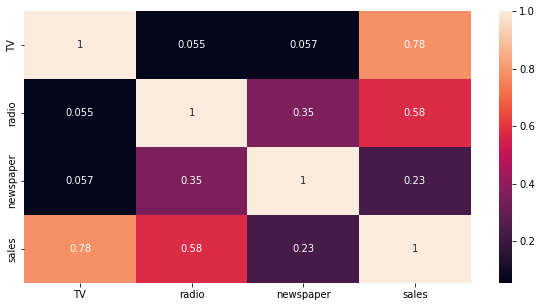

In [4]:
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True);

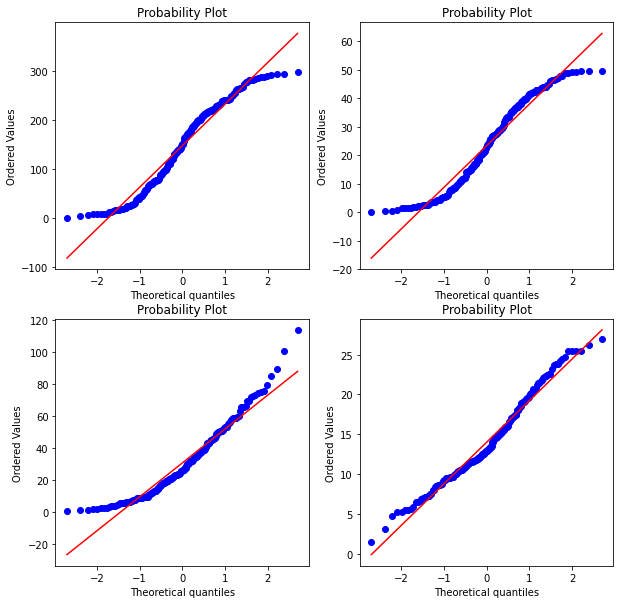

In [5]:
import pylab
plt.figure(figsize=(10,10))
plot_num=1
for i in df.columns:
    if plot_num<5:
        plt.subplot(2,2,plot_num)
        st.probplot(df[i],dist="norm", plot=pylab)
        plot_num+=1

In [6]:
x=st.boxcox(df["TV"])
x

(array([70.23046136, 20.323362  ,  9.49979658, 51.47616357, 58.721859  ,
         5.25169577, 24.76540516, 43.2953103 ,  5.19625066, 63.24793042,
        27.55181965, 66.71525453, 12.39466456, 36.99264232, 64.25560972,
        62.21066018, 28.09055528, 81.50721853, 28.53145135, 50.40739034,
        67.56593806, 71.87415127,  7.59680687, 69.82298969, 26.33365026,
        77.51113253, 49.27874687, 72.47857687, 74.41368188, 28.96991569,
        83.95499994, 41.30712447, 36.90681994, 78.09902179, 36.47661571,
        83.48879091, 78.38149643, 30.24056772, 19.82513185, 69.75499252,
        63.88134366, 57.80135628, 84.1031382 , 64.90865228, 12.93725079,
        57.33908232, 34.73694367, 72.43386855, 69.57354701, 27.80580827,
        63.24793042, 37.81858014, 67.10660266, 59.15603729, 77.4675197 ,
        63.03627373,  4.45835887, 47.54167578, 65.81423769, 65.79107508,
        23.43101681, 77.1619752 , 72.29968241, 38.46900318, 46.20373778,
        28.46861655, 15.50558215, 48.34823153, 71.8

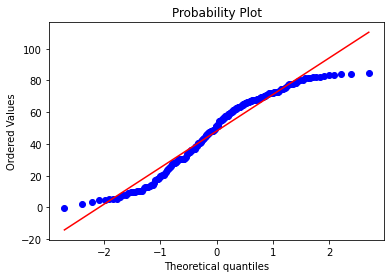

In [7]:
st.probplot(x[0], dist="norm", plot= pylab);

In [8]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [9]:
df.kurtosis()

TV          -1.226495
radio       -1.260401
newspaper    0.649502
sales       -0.408869
dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
#pip install sklearn

In [12]:
# for normalisation
X=df.drop(columns=["sales"])
y=df.sales

In [13]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test= train_test_split(X_scaled,y, test_size=0.10,random_state=123)

In [16]:
print(X_train.shape)

(180, 3)


In [17]:
X_test.shape

(20, 3)

In [18]:
Y_train.shape

(180,)

In [19]:
Y_test.shape

(20,)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
lr.intercept_

2.858967994187873

In [23]:
lr.coef_

array([13.6687191 ,  9.33460805,  0.03203404])

In [24]:
Y_pred=lr.predict(X_test)

In [25]:
Y_pred[0:5]

array([12.65543322,  6.53635939, 15.58937422,  9.75408713, 14.13876916])

In [26]:
Y_test[0:5]

51     11.4
128     8.8
38     14.7
150    10.1
20     14.6
Name: sales, dtype: float64

In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [28]:
r2_score(Y_test,Y_pred)

0.8914812795822676

In [29]:
mse=mean_squared_error(Y_test,Y_pred)

In [30]:
np.sqrt(mse)

1.5973008705003744

In [31]:
mae= mean_absolute_error(Y_test,Y_pred)
mae

1.1961657263808898

In [32]:
mape=mean_absolute_percentage_error(Y_test,Y_pred)
mape

0.12215735370671141

In [33]:
X_test[:,0]

array([0.67331755, 0.26885357, 0.25025364, 0.14879946, 0.49577274,
       0.8031789 , 0.55765979, 0.61515049, 0.63476496, 0.03719986,
       0.25228272, 0.69090294, 0.18769023, 0.06087251, 0.04193439,
       0.37943862, 0.60906324, 0.93337842, 0.06121069, 0.73621914])

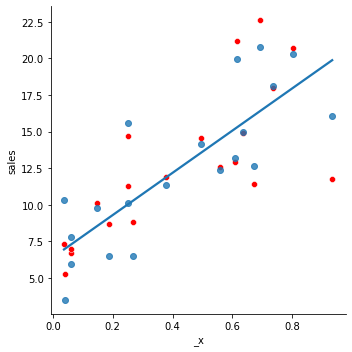

In [34]:
sns.relplot(X_test[:,0],Y_test, color= "Red" )
sns.regplot(X_test[:,0],Y_pred, ci=False)
plt.show()

In [35]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [36]:
lasso=Lasso()

In [37]:
lasso.fit(X_train,Y_train)

Lasso()

In [38]:
y_pred_lasso=lasso.predict(X_test)

In [39]:
r2_score(Y_test,y_pred_lasso)

0.09307621969671465

In [40]:
Ridge=Ridge()

In [41]:
Ridge.fit(X_train,Y_train)

Ridge()

In [42]:
y_pred_Ridge=Ridge.predict(X_test)

In [43]:
r2_score(Y_test,y_pred_Ridge)

0.8949899523746728

In [44]:
elasticnet=ElasticNet()

In [45]:
elasticnet.fit(X_train,Y_train)

ElasticNet()

In [46]:
y_pred_elasticnet=elasticnet.predict(X_test)

In [47]:
r2_score(Y_test,y_pred_elasticnet)

0.05945665700375491

In [48]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [49]:
l1=LassoCV(cv=3)

In [50]:
l1.fit(X_train,Y_train)

LassoCV(cv=3)

In [51]:
y_pred_l1=l1.predict(X_test)

In [52]:
r2_score(Y_test,y_pred_l1)

0.8928241289890236

In [53]:
from statsmodels.regression.linear_model import OLS

In [54]:
import statsmodels.api as sm

In [55]:
ols=sm.OLS(y,X)

In [56]:
model= ols.fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                   2.43e-171
Time:                        14:18:13   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""